### A. Import dữ liệu cần thiết

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from collections import Counter
import re

In [58]:
trending_videos = pd.read_csv('Data/trending_videos.csv', index_col=False)
trending_videos_unique = pd.read_csv('Data/trending_videos_unique.csv', index_col=False)

### B. Trực quan hoá

#### 1. Phân tích tổng quan

##### a. Thời điểm đăng trong ngày của video

In [59]:
upload_time = trending_videos_unique[['published_at']].copy()
upload_time['published_at'] = pd.to_datetime(upload_time['published_at'])
upload_time['hour'] = upload_time['published_at'].dt.hour
time_ranges = []
video_counts = []
for i in range(24):
    time_ranges.append(f'{i}h - {i+1}h')
    video_counts.append(upload_time[(upload_time['hour'] >= i) & (upload_time['hour'] < i+1)].shape[0])

time_video_df = pd.DataFrame({'Time Range': time_ranges, 'Video Count': video_counts})

In [60]:
time_video_df

,Time Range,Video Count
0,0h - 1h,60
1,1h - 2h,32
2,2h - 3h,18
3,3h - 4h,22
4,4h - 5h,34
5,5h - 6h,25
6,6h - 7h,18
7,7h - 8h,18
8,8h - 9h,34
9,9h - 10h,58


In [61]:
fig = px.box(upload_time, 
       x='hour', 
       title='Box Plot of Video Upload Times')
fig.update_xaxes(tickmode='linear', dtick=1)
fig.show()

In [62]:
fig = px.bar(time_video_df, 
             x='Time Range', 
             y='Video Count', 
             title='Number of Videos Uploaded in Each Time Range')
fig.show()

##### b. Thời gian tồn tại trên trending

In [63]:
time_on_trending = trending_videos_unique[['trending_time']].copy()
time_on_trending['trending_time'] = pd.to_timedelta(time_on_trending['trending_time'])
time_on_trending['trending_time'] = time_on_trending['trending_time'].dt.days
time_on_trending = time_on_trending.groupby('trending_time').size()
time_on_trending = time_on_trending.reset_index(name='count')
time_on_trending

,trending_time,count
0,1,148
1,2,133
2,3,153
3,4,187
4,5,190
5,6,200
6,7,218
7,8,191
8,9,159
9,10,143


In [64]:
fig = px.box(time_on_trending, 
       x='trending_time',
       labels={'trending_time':'Trending time'},
       title='Box plot of time on trending')
fig.update_xaxes(tickmode='linear', dtick=1)
fig.show()

In [65]:
fig = px.bar(time_on_trending,
             x='trending_time', 
             y='count',
             labels={'trending_time':'Days','count':'Videos'},
             title='Bar plot trending time')
fig.update_xaxes(tickmode='linear', dtick=1)
fig.show()

#### 2. Phân tích theo chủ đề

##### a. Phần trăm của từng chủ đề trên trending

In [66]:
category_counts = trending_videos['category'].copy().value_counts()
category_full = category_counts.reset_index()
category_full

,category,count
0,Entertainment,6551
1,People & Blogs,4992
2,Music,1269
3,Gaming,1207
4,Comedy,770
5,Sports,609
6,Howto & Style,538
7,News & Politics,489
8,Film & Animation,432
9,Pets & Animals,271


In [ ]:
threshold = 500
category_pie = category_full.copy()
category_pie['category'] = category_pie['category'].apply(lambda x: x if category_counts[x] >= threshold else 'Others')
category_pie = category_pie.groupby('category').sum().reset_index()

In [78]:
px.pie(category_pie, values='count', names='category', title='Percent of categories')

##### b. Trung bình lượt tương tác theo chủ đề

In [81]:
general_category = trending_videos[['category', 'view_count', 'like_count', 'comment_count']]
general_category = general_category.groupby('category').mean().reset_index()
general_category['like_to_view'] = (general_category['like_count'] / general_category['view_count']) * 100
general_category['comment_to_view'] = (general_category['comment_count'] / general_category['view_count'])* 100

In [80]:
general_category

,category,view_count,like_count,comment_count,like_to_view,comment_to_view
0,Autos & Vehicles,3.107792e+06,6.514688e+04,373.597222,2.096243,0.012021
1,Comedy,2.000528e+07,3.692852e+05,885.325974,1.845939,0.004425
2,Education,1.414157e+07,1.423025e+05,689.653846,1.006271,0.004877
3,Entertainment,1.565211e+07,4.495979e+05,5875.157075,2.872443,0.037536
4,Film & Animation,2.598126e+07,1.114053e+06,1956.761574,4.287909,0.007531
5,Gaming,1.139973e+07,4.372097e+05,1862.311516,3.835263,0.016336
6,Howto & Style,3.435267e+07,6.074260e+05,834.693309,1.768206,0.002430
7,Music,1.078366e+07,3.371908e+05,27022.155240,3.126868,0.250584
8,News & Politics,2.137084e+06,3.040098e+04,686.476483,1.422545,0.032122
9,People & Blogs,1.713809e+07,3.889904e+05,1859.762220,2.269742,0.010852


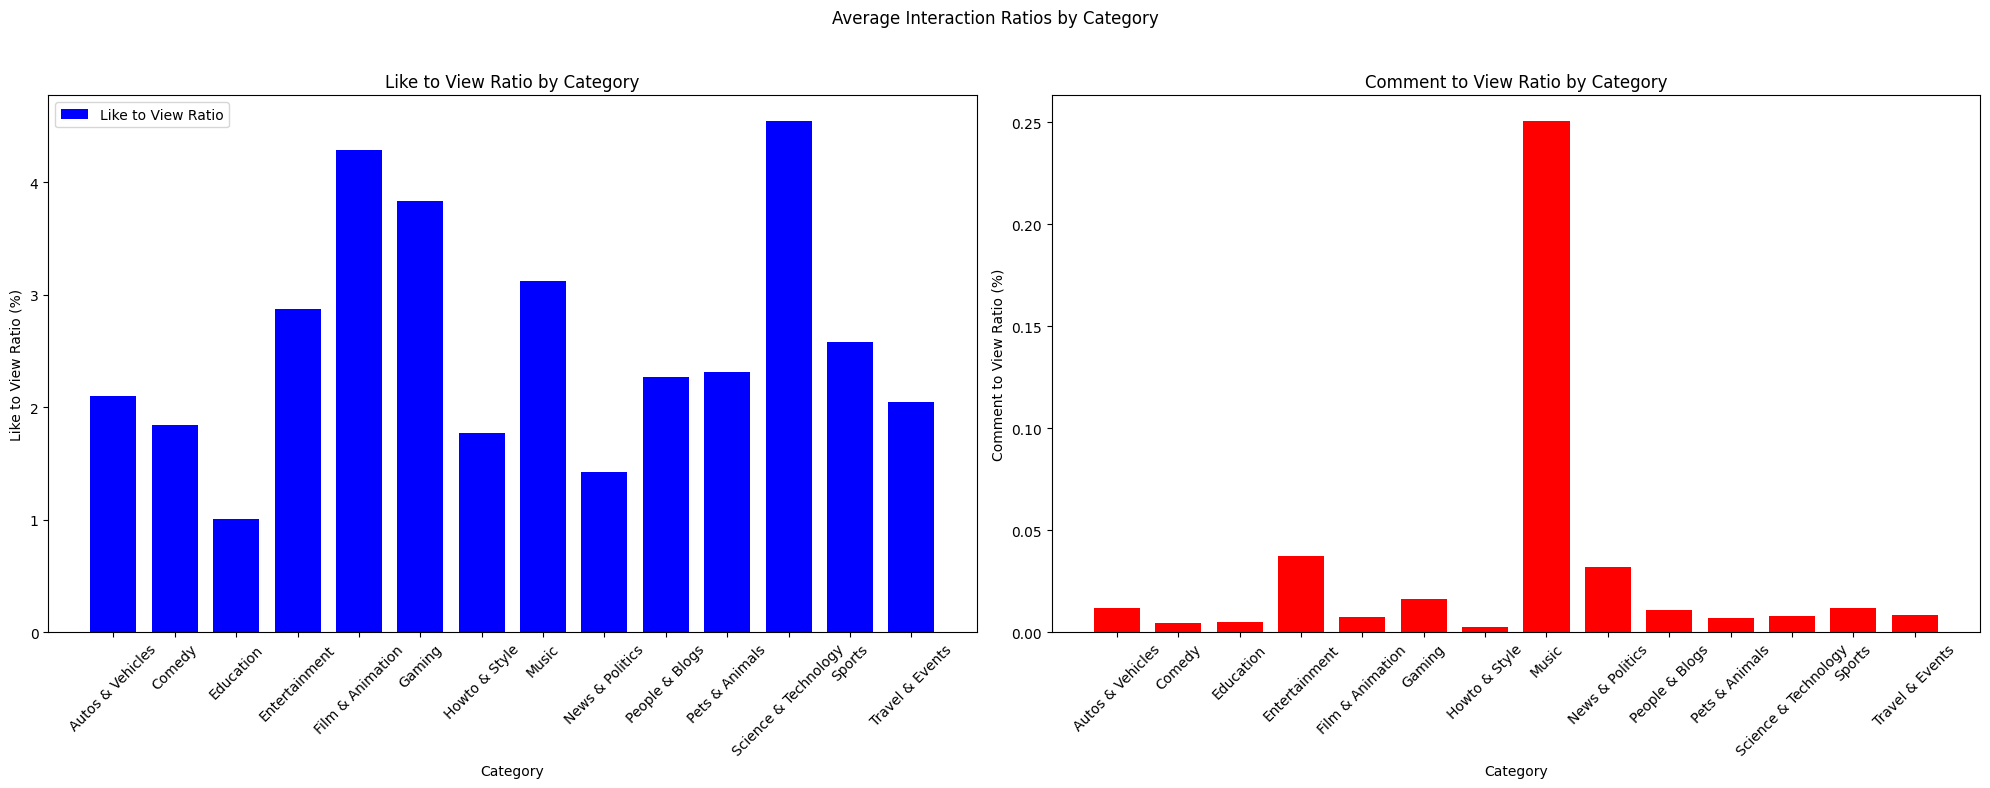

In [69]:
x = range(len(general_category['category']))
width = 0.75
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8))

axes[0].bar(x, general_category['like_to_view'], width=width, label='Like to View Ratio', color='b')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Like to View Ratio (%)')
axes[0].set_xticks(x)
axes[0].set_xticklabels(general_category['category'], rotation=45)
axes[0].tick_params(axis='y')
axes[0].set_title('Like to View Ratio by Category')
axes[0].legend()

axes[1].bar(x, general_category['comment_to_view'], width=width, label='Comment to View Ratio', color='r')
axes[1].set_xlabel('Category')
axes[1].set_ylabel('Comment to View Ratio (%)')
axes[1].set_xticks(x)
axes[1].set_xticklabels(general_category['category'], rotation=45)
axes[1].tick_params(axis='y')
axes[1].set_title('Comment to View Ratio by Category')

plt.suptitle('Average Interaction Ratios by Category')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

##### c. Thời gian trending trung bình của chủ đề

In [70]:
trending_category = trending_videos_unique[['category', 'trending_time']].copy()
trending_category['trending_time'] = pd.to_timedelta(trending_category['trending_time'])
trending_category = trending_category.groupby('category').mean()
trending_category = trending_category / np.timedelta64(1, 'h') #change days -> hour
trending_category = trending_category.reset_index()
trending_category = trending_category.sort_values('trending_time')

In [71]:
trending_category

,category,trending_time
12,Sports,134.181818
8,News & Politics,148.148148
5,Gaming,150.523077
4,Film & Animation,162.830769
1,Comedy,167.357143
6,Howto & Style,170.805195
11,Science & Technology,179.294118
9,People & Blogs,182.666667
3,Entertainment,198.564356
2,Education,212.000000


In [73]:
px.bar(trending_category, 
       x='trending_time', 
       y='category', 
       labels={'category': 'Category', 'trending_time': 'Average Trending Time (hours)'}, 
       title='Average Trending Time by Category')

#### 3. Phân tích theo nội dung chi tiết

##### a. Từ khoá trong tag

In [74]:
video_tags = trending_videos_unique['video_tags'].copy()
video_tags = video_tags.dropna()
tags_list = []
for tagline in video_tags:
    tags_list.extend(tagline.split(','))
count_tags = Counter(tags_list)
tags_df = pd.DataFrame(count_tags.items(),columns=['tag','count'])
tags_df_sort = tags_df.sort_values('count',ascending=True).tail(25)

In [75]:
tags_df_sort

,tag,count
14,tiktok 2024,57
314,đấu trường danh vọng,60
315,garena liên quân mobile,61
311,garena liên quân,61
312,liên quân mobile,61
317,garena,61
316,aov,61
313,liên quân,62
746,phim ngắn,65
319,Esports,72


In [76]:

px.bar(tags_df_sort,
       x='count', 
       y='tag', 
       title='Top 25 Tags by Count',
       height=600,width=800)

##### b. Độ dài tiêu đề

In [83]:
titles = trending_videos_unique['title'].copy()
def clean_title(title):
    return re.sub(r'[^\w\s]', '', title, flags=re.UNICODE)
def get_len_title(title):
    title = title.strip()
    return len(title.split(' '))

cleaned_title = titles.apply(clean_title)
len_titles = cleaned_title.apply(get_len_title)
count_len = Counter(len_titles)
len_df = pd.DataFrame(count_len.items(),columns=['len','count'])
len_df_to_plot = len_df.sort_values('len',ascending=True)
len_df_to_plot

,len,count
17,1,50
19,2,52
6,3,75
14,4,95
12,5,102
13,6,111
2,7,109
3,8,110
1,9,144
7,10,157


In [86]:
fig = px.box(len_df_to_plot,
       x='len',
       labels={'len':'Title Length (words)'},
       title='Box Plot of Title Lengths')
fig.update_xaxes(tickmode='linear', dtick=1)
fig.show()

In [87]:
fig = px.bar(len_df_to_plot,
             x='len',
             y='count',
             labels={'len':'Title Length (words)','count':'Count'},
             title='Distribution of Title Lengths')
fig.update_xaxes(tickmode='linear', dtick=1)
fig.show()

#### 4. Phân tích theo thời gian

##### a. Độ dài video theo thời gian

In [88]:
duration_videos = trending_videos[['snapshot_date', 'duration']].copy()
duration_videos['month'] = pd.to_datetime(duration_videos['snapshot_date']).dt.to_period('M')
bins = [pd.Timedelta(minutes=0), pd.Timedelta(minutes=1), pd.Timedelta(minutes=10), pd.Timedelta(minutes=60), pd.Timedelta(hours=24)]
labels = ['<1p', '1-10p', '10-60p', '>60p']
duration_videos['duration_time'] = pd.cut(duration_videos['duration'], bins=bins, labels=labels, right=False)
duration_videos = duration_videos.groupby(['month', 'duration_time'], observed=False).size().unstack(fill_value=0)
duration_videos = duration_videos.reset_index()

In [89]:
duration_videos

duration_time,month,<1p,1-10p,10-60p,>60p
0,2023-11,453,424,173,386
1,2023-12,777,291,146,245
2,2024-01,847,212,117,216
3,2024-02,998,196,29,126
4,2024-03,948,288,56,105
5,2024-04,1063,223,86,72
6,2024-05,1191,157,77,107
7,2024-06,997,256,134,77
8,2024-07,912,278,53,248
9,2024-08,912,227,73,317


In [90]:
duration_videos = trending_videos[['snapshot_date', 'duration']].copy()
duration_videos['week'] = pd.to_datetime(duration_videos['snapshot_date']).dt.to_period('W')
bins = [pd.Timedelta(minutes=0), pd.Timedelta(minutes=1), pd.Timedelta(minutes=10), pd.Timedelta(minutes=60), pd.Timedelta(hours=24)]
labels = ['<1p', '1-10p', '10-60p', '>60p']
duration_videos['duration_time'] = pd.cut(duration_videos['duration'], bins=bins, labels=labels, right=False)
duration_videos = duration_videos.groupby(['week', 'duration_time'], observed=False).size().unstack(fill_value=0)
duration_videos = duration_videos.reset_index()

for col in duration_videos.columns[1:]:
    duration_videos[col] = duration_videos[col].cumsum()


In [100]:
duration_videos['week'] = duration_videos['week'].astype(str)
duration_videos_long = duration_videos.melt(id_vars='week', 
											var_name='time', 
											value_name='count')
fig = px.bar(duration_videos_long, 
             x='count', 
             y='time',
             orientation='h', 
             color='time', 
             animation_frame='week', 
             title='Video Duration Over Time',
             labels={'count': 'Number of Videos', 'time': 'Duration Range', 'week': 'Week'},
             text='count')
fig.show()

In [206]:
# # # pd.options.display.float_format = '{:,.0f}'.format
# pd.options.display.float_format = None
# duration_percentage = duration_videos.div(duration_videos.sum(axis=1), axis=0) * 100
# duration_percentage

In [207]:
# duration_percentage.plot(kind='line', figsize=(12, 6))
# plt.title('Phần trăm của từng thời lượng video theo thời gian')
# plt.xlabel('Thời gian')
# plt.ylabel('Phần trăm')
# plt.legend(title='Độ dài')
# plt.show()

##### b. Chủ đề theo thời gian

In [102]:
video_counts = 300
category_area = trending_videos[['snapshot_date', 'category']].copy()
category_area['category'] = category_area['category'].apply(lambda x: x if category_counts[x] >= video_counts else 'Others')
category_area = category_area.groupby(['snapshot_date', 'category']).size().unstack(fill_value=0)
category_area.index = pd.to_datetime(category_area.index)
category_area['month'] = category_area.index.to_period('W')
category_area = category_area.groupby('month').sum()
category_area = category_area.reset_index()

In [103]:
for col in category_area.columns[1:]:
    category_area[col] = category_area[col].cumsum()

In [126]:
category_area['month'] = category_area['month'].astype(str)
category_area_long = category_area.melt(id_vars='month', 
											var_name='categories', 
											value_name='count')
category_area_long = category_area_long.sort_values(by=['month', 'count'], ascending=[True, False])

import plotly.graph_objects as go

import plotly.graph_objects as go
import plotly.express as px

def create_animated_bar_chart(category_area_long):
    # Chuẩn bị dữ liệu
    months = category_area_long['month'].unique()
    
    # Tạo frames
    frames = []
    frame_data = []
    
    for month in months:
        df_month = category_area_long[category_area_long['month'] == month]
        
        # Tìm max count cho tháng này
        max_count_this_month = df_month['count'].max()
        
        # Sắp xếp theo count giảm dần để hiển thị đẹp
        df_month = df_month.sort_values('count', ascending=True)
        
        frame = go.Frame(
            data=[go.Bar(
                x=df_month['count'], 
                y=df_month['categories'],
                orientation='h',
                text=df_month['count'],
                textposition='outside',
                textfont=dict(size=10),
                marker_color=px.colors.qualitative.Plotly[:len(df_month)]
            )],
            name=str(month),
            layout=go.Layout(
                xaxis=dict(
                    # Giới hạn x từ 0 đến max của frame này với padding 10%
                    range=[0, max_count_this_month * 1.1]
                )
            )
        )
        
        frames.append(frame)
    
    # Dữ liệu ban đầu (tháng đầu tiên)
    initial_data = category_area_long[category_area_long['month'] == months[0]]
    initial_data = initial_data.sort_values('count', ascending=True)
    max_count_first_month = initial_data['count'].max()
    
    # Tạo figure
    fig = go.Figure(
        data=[go.Bar(
            x=initial_data['count'], 
            y=initial_data['categories'],
            orientation='h',
            text=initial_data['count'],
            textposition='outside',
            textfont=dict(size=10),
            marker_color=px.colors.qualitative.Plotly[:len(initial_data)]
        )],
        layout=go.Layout(
            title='Video Duration Over Time',
            xaxis_title='Number of Videos',
            yaxis_title='Duration Range',
            height=600,
            xaxis=dict(
                # Giới hạn x ban đầu theo max của tháng đầu tiên
                range=[0, max_count_first_month * 1.1]
            ),
            updatemenus=[{
                'buttons': [
                    {
                        'args': [None, {
                            'frame': {'duration': 800, 'redraw': False},
                            'fromcurrent': True, 
                            'transition': {'duration': 600, 'easing': 'bounce-in-out'}
                        }],
                        'label': 'Play',
                        'method': 'animate'
                    }
                ]
            }]
        ),
        frames=frames
    )
    
    # Cấu hình layout bổ sung
    fig.update_layout(showlegend=False)
    
    return fig

# Sử dụng hàm
fig = create_animated_bar_chart(category_area_long)
fig.show()

In [211]:
# pd.options.display.float_format = None

# category_area = category_area.div(category_area.sum(axis=1), axis=0) * 100
# category_area.plot(kind='area', figsize=(12, 6))
# plt.title('Percentage of Each Category per Month')
# plt.xlabel('Month')
# plt.ylabel('Percentage')
# plt.legend(title='Category')
# plt.show()

##### c. Trung bình tương tác theo thời gian

In [212]:
pd.options.display.float_format = '{:,.0f}'.format

general_videos = trending_videos[["view_count", "like_count", "comment_count"]].copy()
general_videos.describe()

,view_count,like_count,comment_count
count,"17,512","17,512","17,512"
mean,"16,631,531","440,410","5,097"
std,"29,073,052","1,001,456","22,914"
min,"187,782",0,0
25%,"1,703,761","28,766",135
50%,"3,495,725","63,612",427
75%,"17,990,534","323,578","2,064"
max,"290,801,447","11,040,218","438,822"


In [213]:
general_month = trending_videos[["snapshot_date", "view_count", "like_count", "comment_count"]].copy()

general_month['snapshot_date'] = pd.to_datetime(general_month['snapshot_date'])

general_month['snapshot_date'] = general_month['snapshot_date'].dt.to_period('M')

general_month = general_month.groupby('snapshot_date').mean().reset_index()

general_month

,snapshot_date,view_count,like_count,comment_count
0,2023-11,"7,774,582","209,155","7,430"
1,2023-12,"8,396,831","247,525","3,497"
2,2024-01,"11,770,799","308,438","2,803"
3,2024-02,"16,946,634","421,504","3,429"
4,2024-03,"19,947,261","515,162","6,439"
5,2024-04,"18,610,296","520,917","4,341"
6,2024-05,"22,734,065","600,849","3,302"
7,2024-06,"20,153,998","526,412","6,100"
8,2024-07,"21,877,066","660,230","9,501"
9,2024-08,"16,164,299","434,596","6,374"


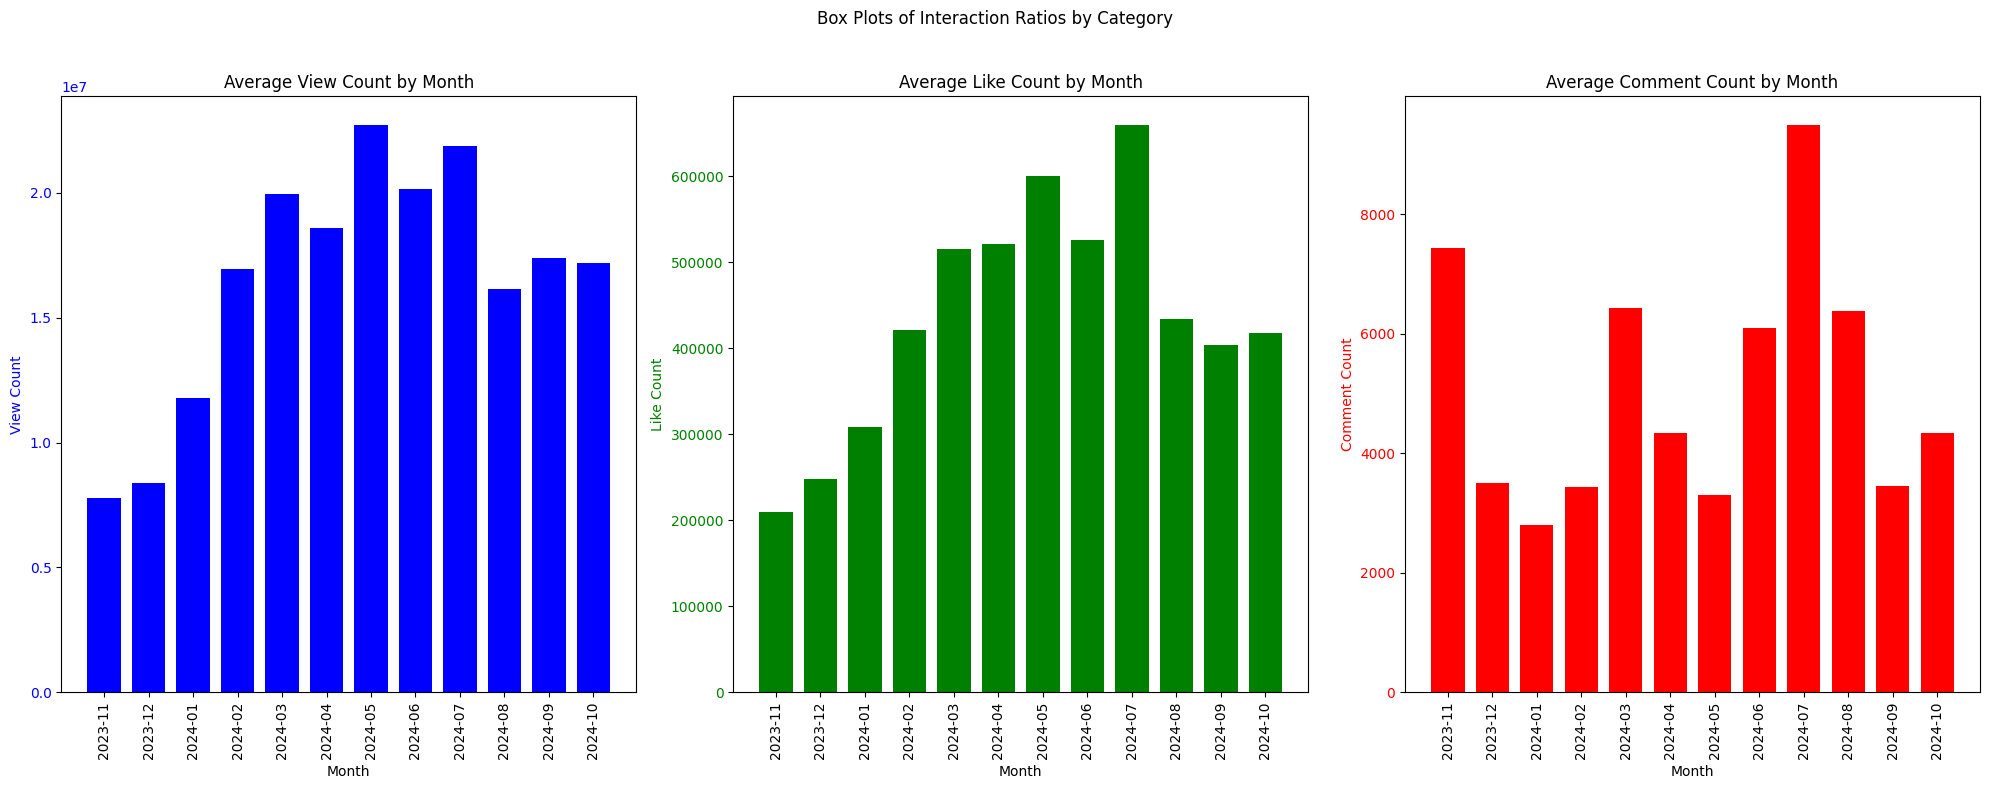

In [214]:
x = range(len(general_month['snapshot_date']))
width = 0.75
ig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 8))

axes[0].bar(x, general_month['view_count'], width=width, label='View Count', color='b')
axes[0].set_xlabel('Month')
axes[0].set_ylabel('View Count', color='b')
axes[0].set_xticks(x)
axes[0].set_xticklabels(general_month['snapshot_date'].astype(str), rotation=90)
axes[0].tick_params(axis='y', labelcolor='b')
axes[0].set_title('Average View Count by Month')

axes[1].bar(x, general_month['like_count'], width=width, label='Like Count', color='g')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Like Count', color='g')
axes[1].set_xticks(x)
axes[1].set_xticklabels(general_month['snapshot_date'].astype(str), rotation=90)
axes[1].tick_params(axis='y', labelcolor='g')
axes[1].set_title('Average Like Count by Month')

axes[2].bar(x, general_month['comment_count'], width=width, label='Comment Count', color='r')
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Comment Count', color='r')
axes[2].set_xticks(x)
axes[2].set_xticklabels(general_month['snapshot_date'].astype(str), rotation=90)
axes[2].tick_params(axis='y', labelcolor='r')
axes[2].set_title('Average Comment Count by Month')

plt.suptitle('Box Plots of Interaction Ratios by Category')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()